In [197]:
import pandas as pd
from model import GPTJ
import decouple
import openai
from utils.safedict import SafeDict
import numpy as np

#- speak like a human

#- if the input is already under 120 characters, you can keep it as it is

# ---------------------------------------------- #
# Prepare dataset
# ---------------------------------------------- #
df = pd.read_csv('./H+GPT3/all_final.csv')
print(len(df[df.source=='AI']))
print(len(df[df.source=='AI'].a1.unique()))

# df = df[df.source=='AI']
prompt = """Rephrase the input text using the following constraints:
- keep the same meaning and ideas
- use simple language, avoid using abstract concepts
- summarize the input text into 1 sentence or 2 very short sentences (keep it under 120 characters)
- take inspiration (in terms of phrasing and length, not the content) from these examples from real humans: 
example 1: {}
example 2: {}
example 3: {}
input text: {}
output text:
"""


def get_examples(title):
    return df[(df.source=='Human') & (df.title==title)].sample(3).a1.values.tolist()


df.loc[df.title.str.contains('Sophie'), 'title'] = 'Sophie'

# df['a2'] = df.apply(lambda x: prompt.format(*get_examples(x['title']), x['a1']), axis=1)
df['q2'] = df.apply(lambda x: prompt.format(*get_examples(x['title']), x['a1']), axis=1)


# ---------------------------------------------- #
# Prepare open ai model
# ---------------------------------------------- #
openai.api_key = decouple.config('OPENAI_API_KEY')

# Basic configuration
config = SafeDict(**{
    # Engine
    "engine": 'text-davinci-003',  # engine being used from the API
    "temperature": 1,  # Temperature of the softmax sampling for the engine
    "max_tokens": 256,  # Max nb of tokens that will be processed by the engine
    # Question Configuration
    # 'full': keeps the full question // 'half': cuts the second half of the question
    "question_mode": "full",
    # [int] : nb of answers that will be shown in the prompt given to the model
    "nb_answers": 0,
    "additional_questions": [],
    "nb_run_per_question": 1,
    # Name of the training
    "name": None,  # Name of the training
    "prefix": "",
    "data_path": None,  # Path to the training data
    "analyses": [],
    "exp": None
})


gpt = GPTJ(config=config)

np.random.seed(123)
count = 0
for i, row in df[df.source=='AI'].iterrows():
    count += 1
    print(i)
    gpt.reset_rec()
    a, fa = gpt.ask_rec(row['q2'])
    # take df and add col a2 using i as index
    df.loc[i, 'a2'] = a
    if count > 10:
        break
    
df.to_csv('./H+GPT3/dv2_all_final_disguise_4.csv')

    

1766
1699
4
8
11
Error:  That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 2f1ef7cb5b9e333567960b9d7a3bb3d8 in your message.)
Bad GateWay -- retrying in 1sec
12
13
14
15
17
18
19
24


In [200]:
# ---------------------------------------------- #
# Prepare dataset
# ---------------------------------------------- #
df = pd.read_csv('./H+GPT3/dv2_all_final_disguise.csv')
print(len(df[df.source=='AI']))
print(len(df[df.source=='AI'].a1.unique()))

# df = df[df.source=='AI']
prompt = """Add 1 spelling mistake to the input text (e.g. replace a letter by another that is close on the keyboard, or remove a letter). 
input text: {}
output text:
"""


# ---------------------------------------------- #
# Prepare open ai model
# ---------------------------------------------- #
openai.api_key = decouple.config('OPENAI_API_KEY')

# Basic configuration
config = SafeDict(**{
    # Engine
    "engine": 'text-davinci-003',  # engine being used from the API
    "temperature": 1,  # Temperature of the softmax sampling for the engine
    "max_tokens": 256,  # Max nb of tokens that will be processed by the engine
    # Question Configuration
    # 'full': keeps the full question // 'half': cuts the second half of the question
    "question_mode": "full",
    # [int] : nb of answers that will be shown in the prompt given to the model
    "nb_answers": 0,
    "additional_questions": [],
    "nb_run_per_question": 1,
    # Name of the training
    "name": None,  # Name of the training
    "prefix": "",
    "data_path": None,  # Path to the training data
    "analyses": [],
    "exp": None
})


gpt = GPTJ(config=config)

np.random.seed(123)
count = 0
for i, row in df[df.source=='AI'].iterrows():
    count += 1
    print(i)
    gpt.reset_rec()
    a, fa = gpt.ask_rec(prompt.format(row['a2']))
    # take df and add col a2 using i as index
    df.loc[i, 'a2'] = a
    
df.to_csv('./H+GPT3/dv2_all_final_disguise_mistakes.csv')

 

1766
1699
4
8
11
12
13
14
15
17
18
19
24
26
27
28
30
32
36
37
38
39
40
41
46
48
50
51
52
55
56
61
62
63
64
66
69
70
71
72
73
75
77
78
79
80
81
82
83
84
86
87
88
89
92
93
101
103
104
106
108
109
110
113
114
116
117
118
121
123
125
126
128
129
130
131
133
137
138
143
149
150
152
154
158
159
163
166
167
169
170
171
174
176
177
180
182
183
185
187
189
190
191
193
195
198
200
205
207
208
213
216
217
220
221
224
225
226
230
231
235
239
241
242
246
250
252
253
256
258
259
260
262
264
268
269
273
274
275
282
283
287
289
290
292
293
296
297
298
300
302
305
306
307
309
312
314
315
317
318
319
320
321
325
328
329
330
331
335
339
341
342
343
344
345
346
348
350
351
352
353
354
355
356
360
362
365
369
370
371
374
375
378
379
387
393
394
395
397
398
401
403
409
411
413
414
415
417
419
421
425
426
427
428
431
434
435
441
442
445
446
449
454
455
458
459
463
465
466
467
468
469
473
475
476
477
478
479
480
486
487
490
495
496
497
499
503
506
508
514
515
516
518
521
522
527
528
529
530
531
533
534
536
53

In [219]:
import language_tool_python as ltp

fname = './H+GPT3/dv2_all_final_disguise_mistakes.csv'
df = pd.read_csv(fname)
df['a2'] = df.a2.str.lower()
#titles = df[(df.source=='AI') & (df.a2.str.len() > 10)].title
#
#print(len(titles))
#df = df[df.title.isin(titles)]
#dropnb = len(df[df.source=='Human']) - len(titles)
#indexes = df[df.source=='Human'].sample(dropnb).index
#
#print('Size of the current dataset: ', len(df))
#print('rows to drop: ', dropnb)
#
#df = df.drop(indexes)
#df  = df[((df.source=='AI') & (df.a2.str.len() > 10)) | (df.source=='Human')]
#
#print('Size of the current dataset after dropping: ', len(df))
#print('Size of the current dataset where source is AI: ', len(df[df.source=='AI']))
#print('Size of the current dataset where source is Human: ', len(df[df.source=='Human']))

def rule(x):
   dic = ['HIV', 'Mrs', 'VCR', 'Monday', 'Santiago', 'Morris']
   err = []
   for m in tool.check(x):
         if m.category in ('TYPOS', 'GRAMMAR') and m.ruleId not in ('UPPERCASE_SENTENCE_START', 'I_LOWERCASE'):
            if any(el in m.replacements for el in dic): 
               continue
            err.append(m)
   return len(err)

def rulecorrect(x):
    return ltp.utils.correct(x, tool.check(x)) if np.random.random() < 0.85 else x
               
#
with ltp.LanguageTool('en-US', remote_server='http://localhost:8081') as tool:
   df.loc[df.source=='AI', 'a2'] = df[df.source=='AI'].a2.apply(rulecorrect).str.lower()
   df.loc[df.source=='AI', 'corra2'] = df[df.source=='AI'].a2.apply(rule)

   df['corra1'] = df.a1.apply(rule)
   # df['corra2'] = df.a2.apply(rule)

df['lena1'] = df.a1.apply(lambda x: len(x))
df['lena2'] = df.a2.apply(lambda x: len(x) if isinstance(x, str) else None)

df.loc[df.source=='Human', 'lena2'] = None
df.loc[df.source=='Human', 'corra2'] = None

df_short = df[['corra1', 'corra2', 'a1', 'a2', 'lena1', 'lena2', 'title', 'source']]
#
df.to_csv('./H+GPT3/dv2_all_final_disguise_mistakes_correct.csv') 

In [213]:
test_str = "mr morris's schedule is flexible so he would be happy to have either appointment on monday whereas mrs santiago can only attend at 10am. both people will therefore be given an appointment for monday this way."

def rule(x):
   dic = ['HIV', 'Mrs', 'VCR', 'Monday', 'Santiago', 'Morris']
   err = []
   for m in tool.check(x):
         if m.category in ('TYPOS', 'GRAMMAR') and m.ruleId not in ('UPPERCASE_SENTENCE_START', 'I_LOWERCASE'):
            if any(el in m.replacements for el in dic): 
               continue
            err.append(m)
   return err


# ltp.utils.correct(test_str, tool.check(test_str))
with ltp.LanguageTool('en-US', remote_server='http://localhost:8081') as tool:
    err = rule(test_str)

# a = set(['Mrs', 'HIV'])
# print(any(el in a for el in err[0].replacements))

             T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test -0.0807   58   two-sided  0.935958  [-0.06, 0.05]  0.020837  0.263   

           power  
T-test  0.050722  


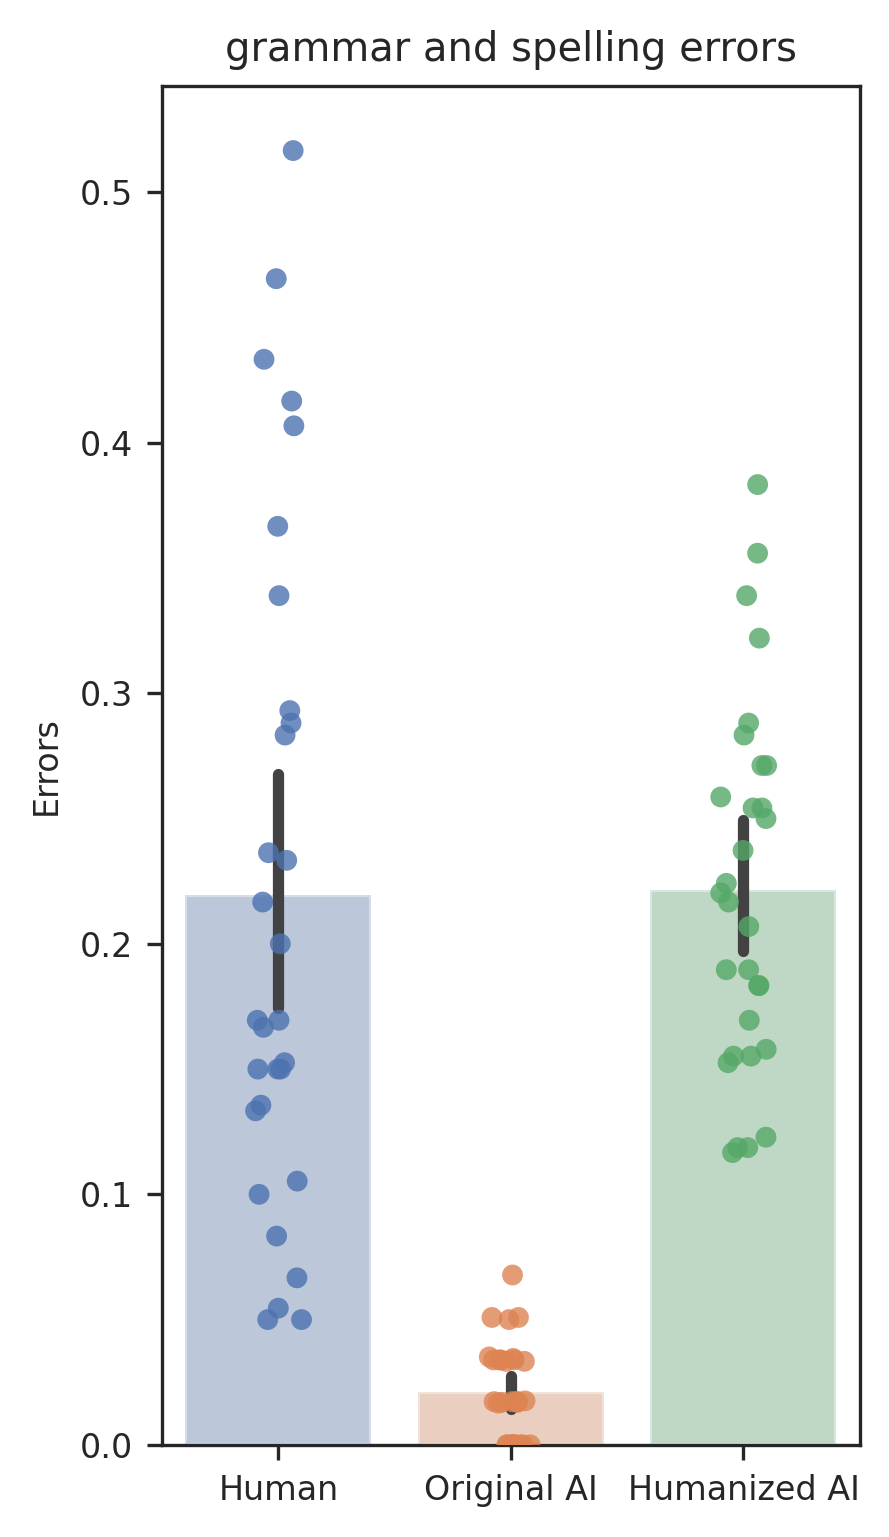

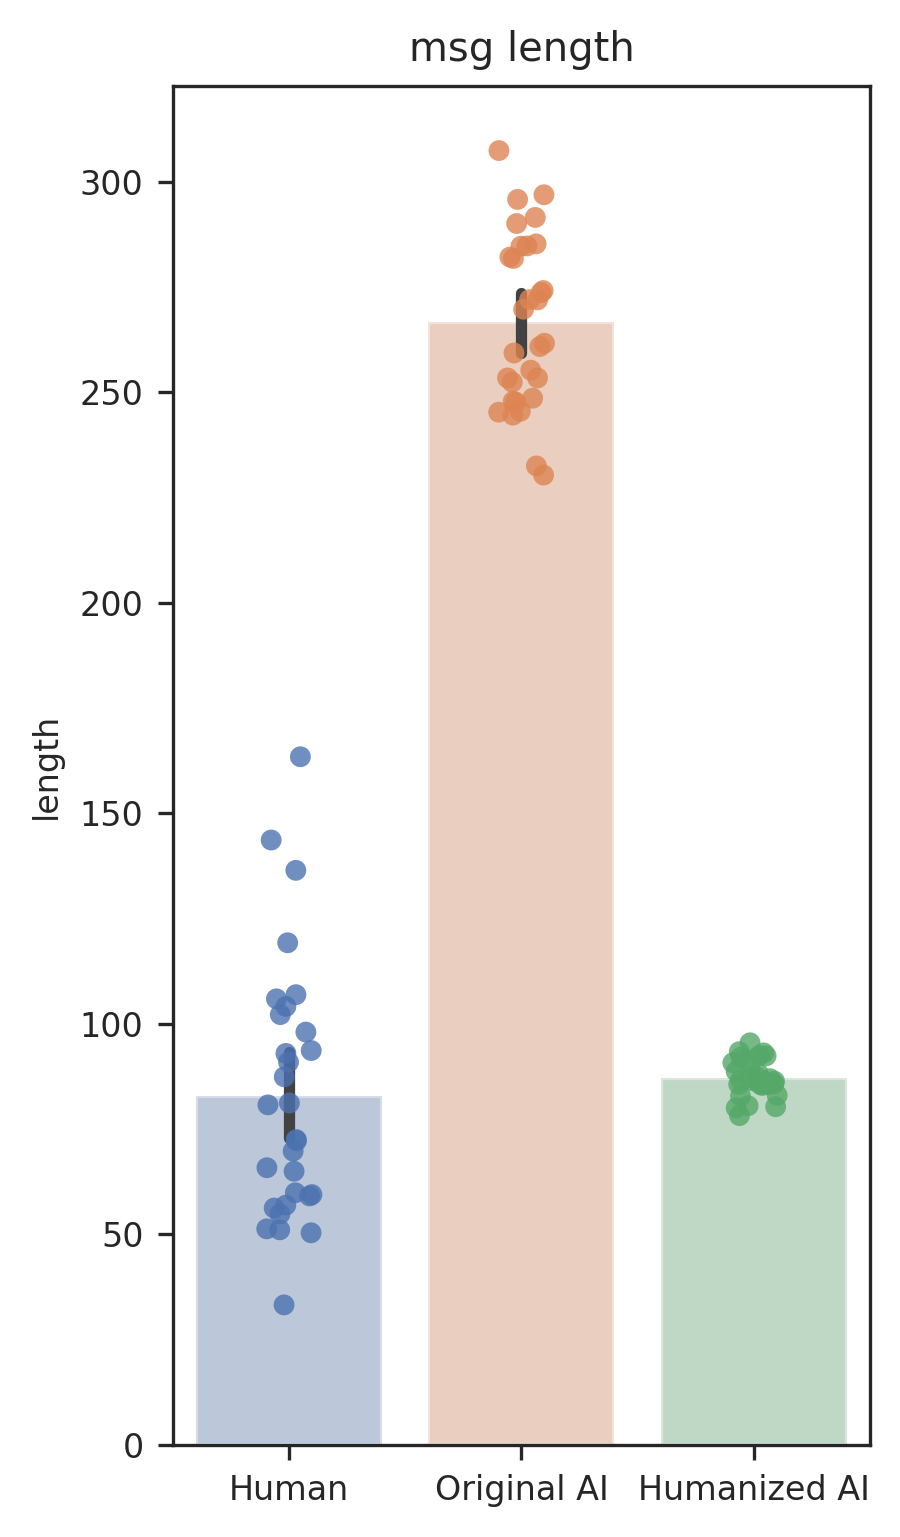

               T  dof alternative     p-val           CI95%   cohen-d   BF10  \
T-test -0.766826   58   two-sided  0.446295  [-15.63, 6.97]  0.197994  0.336   

           power  
T-test  0.117275  


SyntaxError: 'return' outside function (4007726903.py, line 34)

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

fname = './H+GPT3/dv2_all_final_disguise_mistakes_correct.csv'
df = pd.read_csv(fname)


df2 = df[df.source=='AI'].groupby('sub_id', as_index=False).mean()
df3 = df[df.source=='Human'].groupby('sub_id', as_index=False).mean()
plt.title('grammar and spelling errors')
sns.set({'figure.figsize': (3, 6), 'figure.dpi': 300, 'font.size': 8})
sns.set_style('ticks')
data = [df3['corra1'], df2['corra1'], df2['corra2']]
sns.barplot(data=data, alpha=0.4)
sns.stripplot(data=data, alpha=0.8)
plt.ylabel('Errors')
plt.xticks([0, 1, 2], ['Human', 'Original AI', 'Humanized AI'])
print(pg.ttest(df3['corra1'], df2['corra2']))
plt.show()


plt.title('msg length')
sns.set_style('ticks')
data = [df3['lena1'], df2['lena1'], df2['lena2']]
sns.barplot(data=data, alpha=0.4)
sns.stripplot(data=data, alpha=0.8)
plt.ylabel('length')
plt.xticks([0, 1, 2], ['Human', 'Original AI', 'Humanized AI'])
plt.show()

plt.show()
print(pg.ttest(df3['lena1'], df2['lena2']))
return 

# same with length
plt.title('Human vs AI slang: length')
sns.set_style('ticks')
sns.barplot(data=[df3['lena1'],  df2['lena2']], alpha=0.4, zorder=0)
sns.stripplot(data=[df3['lena1'],  df2['lena2']], alpha=0.8)
# sns.stripplot(data=df2[['lena1', 'lena2']], alpha=0.4)
plt.xticks([0, 1], ['Human', 'AI Humanized'])
plt.ylabel('Length')
plt.show()
print(pg.ttest(df3['lena1'], df2['lena2']))

plt.title('Human vs AI slang')
sns.set_style('ticks')
sns.barplot(data=[df3['corra1'],  df2['corra2']], alpha=0.4)
sns.stripplot(data=[df3['corra1'],  df2['corra2']], alpha=0.8)
plt.ylabel('Errors')
plt.xticks([0, 1], ['Human', 'AI Humanized'])
plt.show()
print(pg.ttest(df3['corra1'], df2['corra2']))


